In [23]:
#import dependencies 
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import linregress


In [2]:
data_df=pd.read_csv("Data/HappinessAlcoholConsumption.csv")
data_df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


# Dataframe Information


In [3]:
data_df = data_df.dropna()

data_df.dtypes

Country              object
Region               object
Hemisphere           object
HappinessScore      float64
HDI                   int64
GDP_PerCapita       float64
Beer_PerCapita        int64
Spirit_PerCapita      int64
Wine_PerCapita        int64
dtype: object

In [4]:
for index, row in data_df.iterrows():
    if row["GDP_PerCapita"] % 1 > 0:
        data_df.loc[index, "GDP_PerCapita"] = 1000 * row["GDP_PerCapita"]
        
data_df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53579.0,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79866.0,185,100,280
2,Iceland,Western Europe,north,7.501,933,60530.0,233,61,78
3,Norway,Western Europe,north,7.498,951,70890.0,169,71,129
4,Finland,Western Europe,north,7.413,918,43433.0,263,133,97


In [5]:
#shape of dataframe
data_df.shape

(122, 9)

In [6]:
#unique regions
data_df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa'], dtype=object)

In [7]:
#unique countries
data_df["Country"].unique()

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Germany', 'Brazil',
       'Belgium', 'Ireland', 'Luxembourg', 'Mexico', 'Singapore',
       'United Kingdom', 'Chile', 'Panama', 'Argentina', 'Czech Republic',
       'United Arab Emirates', 'Uruguay', 'Malta', 'Colombia', 'France',
       'Thailand', 'Qatar', 'Spain', 'Guatemala', 'Suriname', 'Bahrain',
       'Trinidad and Tobago', 'Venezuela', 'Slovakia', 'El Salvador',
       'Nicaragua', 'Uzbekistan', 'Italy', 'Ecuador', 'Belize', 'Japan',
       'Kazakhstan', 'Moldova', 'Russia', 'Poland', 'South Korea',
       'Bolivia', 'Lithuania', 'Belarus', 'Slovenia', 'Peru',
       'Turkmenistan', 'Mauritius', 'Latvia', 'Cyprus', 'Paraguay',
       'Romania', 'Estonia', 'Jamaica', 'Croatia', 'Turkey', 'Jordan',
       'Azerbaijan', 'Philippines', 'China', 'Kyrgyzstan', 'Serbia',
       'Bosnia and

In [8]:
data_df.columns

Index(['Country', 'Region', 'Hemisphere', 'HappinessScore', 'HDI',
       'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita',
       'Wine_PerCapita'],
      dtype='object')

# Importing Population Data
for use in averaging GDP per capita

In [9]:
pop_data = pd.read_csv("Data/Population Data/Global Population Trends(2016-2022).csv")
pop_data_2018 = pop_data.loc[pop_data["Year"] == 2018, ["Country", "Total Population"]]
pop_data_2018.head()

,Country,Total Population
1,Afghanistan,"36,686,784"
6,Albania,"2,866,376"
11,Algeria,"41,927,007"
15,American Samoa,"48,424"
19,Andorra,"75,013"


In [10]:
pop_data_2018["Total Population"]=pop_data_2018["Total Population"].str.replace(",","")
pop_data_2018["Total Population"] = pop_data_2018["Total Population"].astype("int")
pop_data_2018.dtypes

Country             object
Total Population     int32
dtype: object

For both datasets, I looked to see which countries showed up in both datasets, but with different names, e.g. "Republic of Congo" in one set was called "Rep. Congo" in the other. I updated the naming to be consistent in both files to ensure the inner join below would guarantee the maximum number of countries upon joining.

In [11]:
merged_data = pd.merge(pop_data_2018, data_df, how = "inner", left_on = "Country", right_on = "Country")
merged_data

,Country,Total Population,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Albania,2866376,Central and Eastern Europe,north,4.655,782,4132.0,89,132,54
1,Angola,31273533,Sub-Saharan Africa,south,3.866,577,3309.0,217,57,45
2,Argentina,44494502,Latin America and Caribbean,south,6.650,822,12654.0,193,25,221
3,Armenia,2836557,Central and Eastern Europe,north,4.360,749,3606.0,21,179,11
4,Australia,24966643,Australia and New Zealand,south,7.313,938,49897.0,261,72,212
...,...,...,...,...,...,...,...,...,...,...
116,Uzbekistan,32956100,Central and Eastern Europe,north,5.987,703,2106.0,25,101,8
117,Venezuela,29825653,Latin America and Caribbean,north,6.084,766,15692.0,333,100,3
118,Vietnam,94914330,Southeastern Asia,north,5.061,689,2171.0,111,2,1
119,Zambia,17835893,Sub-Saharan Africa,south,4.795,586,1263.0,32,19,4


In [13]:
merged_data.dtypes

Country              object
Total Population      int32
Region               object
Hemisphere           object
HappinessScore      float64
HDI                   int64
GDP_PerCapita       float64
Beer_PerCapita        int64
Spirit_PerCapita      int64
Wine_PerCapita        int64
dtype: object

In [14]:
merged_data_complete = merged_data.copy()

merged_data_complete["GDP"] = merged_data_complete["Total Population"] * merged_data_complete["GDP_PerCapita"]
merged_data_complete["Beer"] = merged_data_complete["Total Population"] * merged_data_complete["Beer_PerCapita"]
merged_data_complete["Spirit"] = merged_data_complete["Total Population"] * merged_data_complete["Spirit_PerCapita"]
merged_data_complete["Wine"] = merged_data_complete["Total Population"] * merged_data_complete["Wine_PerCapita"]

merged_data_complete

,Country,Total Population,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,GDP,Beer,Spirit,Wine
0,Albania,2866376,Central and Eastern Europe,north,4.655,782,4132.0,89,132,54,1.184387e+10,255107464,378361632,154784304
1,Angola,31273533,Sub-Saharan Africa,south,3.866,577,3309.0,217,57,45,1.034841e+11,6786356661,1782591381,1407308985
2,Argentina,44494502,Latin America and Caribbean,south,6.650,822,12654.0,193,25,221,5.630334e+11,8587438886,1112362550,9833284942
3,Armenia,2836557,Central and Eastern Europe,north,4.360,749,3606.0,21,179,11,1.022862e+10,59567697,507743703,31202127
4,Australia,24966643,Australia and New Zealand,south,7.313,938,49897.0,261,72,212,1.245761e+12,6516293823,1797598296,5292928316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Uzbekistan,32956100,Central and Eastern Europe,north,5.987,703,2106.0,25,101,8,6.940555e+10,823902500,3328566100,263648800
117,Venezuela,29825653,Latin America and Caribbean,north,6.084,766,15692.0,333,100,3,4.680241e+11,9931942449,2982565300,89476959
118,Vietnam,94914330,Southeastern Asia,north,5.061,689,2171.0,111,2,1,2.060590e+11,10535490630,189828660,94914330
119,Zambia,17835893,Sub-Saharan Africa,south,4.795,586,1263.0,32,19,4,2.252673e+10,570748576,338881967,71343572


In [15]:
region_data = merged_data_complete.groupby(["Region"])
per_capita_data = region_data[["Total Population", "GDP","Beer", "Spirit", "Wine"]].sum()

per_capita_data["GDP_per"] = per_capita_data["GDP"] / per_capita_data["Total Population"]
per_capita_data["Beer_per"] = per_capita_data["Beer"] / per_capita_data["Total Population"]
per_capita_data["Spirit_per"] = per_capita_data["Spirit"] / per_capita_data["Total Population"]
per_capita_data["Wine_per"] = per_capita_data["Wine"] / per_capita_data["Total Population"]

per_capita_data

,Total Population,GDP,Beer,Spirit,Wine,GDP_per,Beer_per,Spirit_per,Wine_per
Region,,,,,,,,,
Australia and New Zealand,29867243,1.443412e+12,7511115623,2184745696,6150533316,48327.580318,251.483393,73.148556,205.929061
Central and Eastern Europe,399855664,3.123516e+12,84029222003,93655406326,27547055623,7811.608976,210.148885,234.223033,68.892498
Eastern Asia,1584320049,1.773818e+13,128048022427,296369097227,13740633450,11196.085035,80.822068,187.063906,8.672890
Latin America and Caribbean,622440551,5.222640e+12,128613897081,66824806809,19673698945,8390.583703,206.628403,107.359340,31.607354
Middle East and Northern Africa,292431829,2.427295e+12,6934971718,5768497631,1941037654,8300.379495,23.714832,19.725957,6.637573
North America,363903283,2.039195e+13,90278331711,56162375690,31160917116,56036.741731,248.083312,154.333248,85.629667
Southeastern Asia,296274882,1.283568e+12,26537289510,39843909654,352661642,4332.355802,89.569826,134.482915,1.190319
Sub-Saharan Africa,757535067,1.387288e+12,47481844166,11597854322,8293564899,1831.318150,62.679401,15.309990,10.948094
Western Europe,425101959,1.638097e+13,92604106786,47085065775,93387973863,38534.225105,217.839755,110.761818,219.683706


# GDP Analysis
first by regional averages, then by country

In [16]:
#Analysing GDP
gdp_df=data_df[["Country","Region","GDP_PerCapita"]].copy()
gdp_df

,Country,Region,GDP_PerCapita
0,Denmark,Western Europe,53579.0
1,Switzerland,Western Europe,79866.0
2,Iceland,Western Europe,60530.0
3,Norway,Western Europe,70890.0
4,Finland,Western Europe,43433.0
...,...,...,...
117,Tanzania,Sub-Saharan Africa,878.0
118,Liberia,Sub-Saharan Africa,455.0
119,Benin,Sub-Saharan Africa,789.0
120,Togo,Sub-Saharan Africa,577.0


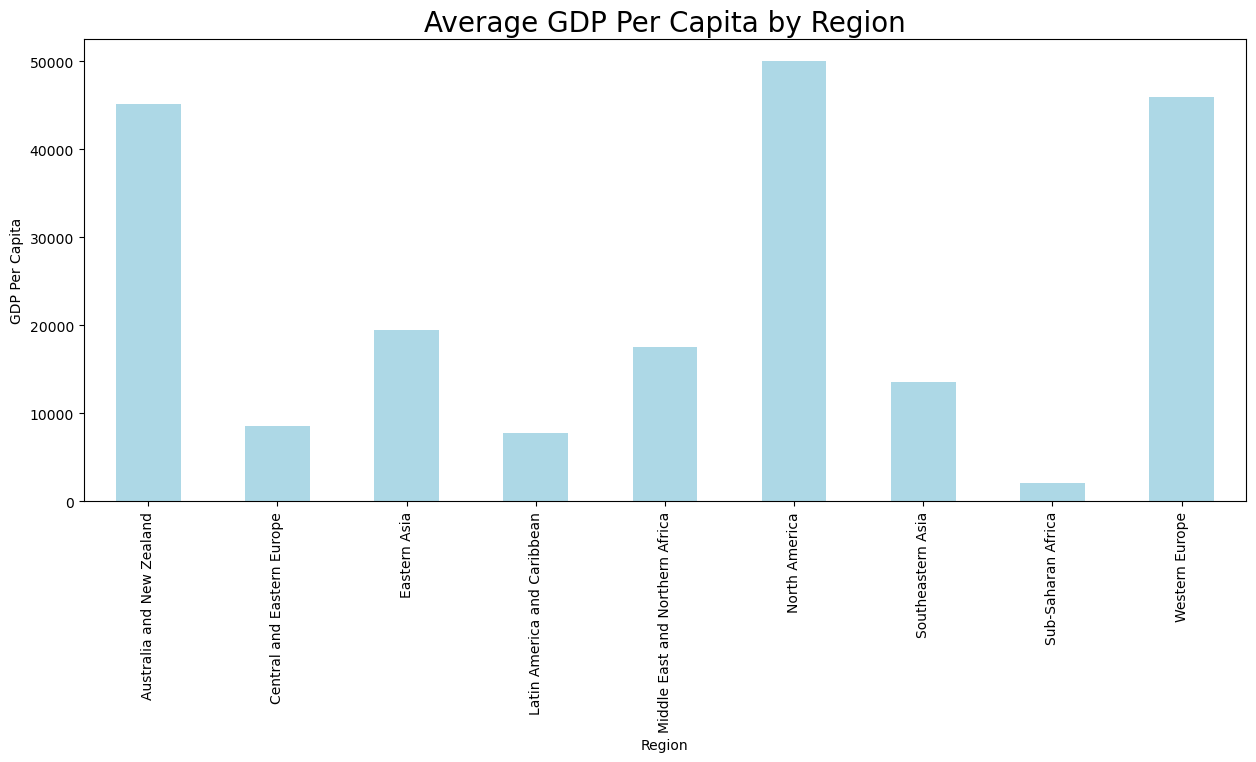

In [17]:
#Average GDP by Region
#***** need to adjust GDP per capita to just GDP (mult by pop of each country) before taking average
plt.figure(figsize=(15, 6))
gdp_df.groupby('Region')['GDP_PerCapita'].mean().plot(kind='bar', color='lightblue')
plt.title('Average GDP Per Capita by Region', fontsize=20)
plt.xlabel('Region')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#chart for GDP by Region
gdp=gdp_df["GDP_PerCapita"]
region=gdp_df["Region"]

plt.bar(region,gdp,color="r",alpha=0.5,align="center")
tick_loactions=[value for value in region]
plt.xticks(tick_loactions,region,rotation=90)

plt.title("GDP by Region")
plt.xlabel("Region")
plt.ylabel("GDP Per Capita")


In [ ]:
#top 20 GDP countries
gdp=gdp_df.sort_values(["GDP_PerCapita"],ascending=False)
gdp.head(25)

In [ ]:
#chart top 25 countries by GDP
gdp=gdp_df["GDP_PerCapita"]
country=gdp_df["Country"]

plt.figure(figsize=(15, 10))
top_25_countries = gdp_df.nlargest(25, 'GDP_PerCapita')
top_25_countries.plot(kind='barh', x='Country', y='GDP_PerCapita', color='lightblue', legend=False)
plt.title('GDP Per Capita of Top 25 Countries', fontsize=20)
plt.xlabel('GDP Per Capita')
plt.ylabel('Country')
plt.show()


In [ ]:
#bottom 20 GDP countries
gdp=gdp_df.sort_values(["GDP_PerCapita"],ascending=True)
gdp.head(25)

In [ ]:
#Bottom 25 countries by GDP
plt.figure(figsize=(15, 10))
smallest_25_countries = gdp_df.nsmallest(25, 'GDP_PerCapita')
smallest_25_countries.plot(kind='barh', x='Country', y='GDP_PerCapita', color='lightcoral', legend=False)
plt.title('Lowest GDP Per Capita of 25 Countries', fontsize=20)
plt.xlabel('GDP Per Capita')
plt.ylabel('Country')
plt.show()

# Human Deveolpment Index (HDI)
first by regional averages, then by country

In [ ]:
#Analysing for HDI by Region
hdi_df=data_df[["Country","Region","HDI"]].copy()
hdi_df

In [ ]:
#average HDI per region
plt.figure(figsize=(15, 6))
hdi_df.groupby('Region')['HDI'].mean().plot(kind='bar', color='lightblue')
plt.title('Average HDI by Region', fontsize=20)
plt.xlabel('Region')
plt.ylabel('Human Development Index')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#HDI per region
hdi=hdi_df["HDI"]
region=gdp_df["Region"]

plt.bar(region,hdi,color="r",alpha=0.5,align="center")
tick_loactions=[value for value in region]
plt.xticks(tick_loactions,region,rotation=90)

plt.title("HDI by Region")
plt.xlabel("Region")
plt.ylabel("Human Development Index")

In [ ]:
#Top 25 HDI Countries
hdi=hdi_df.sort_values(["HDI"],ascending=False)
hdi.head(25)

In [ ]:
#Top 25 HDI Countries Graph
hdi=hdi_df["HDI"]
country=hdi_df["Country"]

plt.figure(figsize=(15, 10))
top_25_countries = hdi_df.nlargest(25, 'HDI')
top_25_countries.plot(kind='barh', x='Country', y='HDI', color='lightblue', legend=False)
plt.title('HDI of Top 25 Countries', fontsize=20)
plt.xlabel('Human Development Index')
plt.ylabel('Country')
plt.show()


In [ ]:
#bottom 25 HDI Countries
hdi=hdi_df.sort_values(["HDI"],ascending=True)
hdi.head(25)

In [ ]:
#bottom 25 HDI Countries
hdi=hdi_df["HDI"]
country=hdi_df["Country"]

plt.figure(figsize=(15, 10))
top_25_countries = hdi_df.nsmallest(25, 'HDI')
top_25_countries.plot(kind='barh', x='Country', y='HDI', color='lightblue', legend=False)
plt.title('HDI of Bottom 25 Countries', fontsize=20)
plt.xlabel('Human Development Index')
plt.ylabel('Country')
plt.show()


## Alcohol Consumption and Happiness

In [20]:
OH_happiness = merged_data_complete[["Country", "HappinessScore", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]].copy()
len(OH_happiness)#.head()

121

In [26]:
# function to create create scatter and Linear Regression plots
def lin_regress(x_vals, y_vals, x_label):
    (slope, intercept, rval, pval, stderr) = linregress(x_vals, y_vals)

    regress_vals = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot best fit line 
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals,regress_vals,"r-")
    # Display regression line equation
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",xycoords="figure points") #

    plt.xlabel(f"{x_label}")
    plt.ylabel(f"Happiness")
    print(f"The r-value is: {rval}")
    plt.show()

The r-value is: 0.48803506917479195


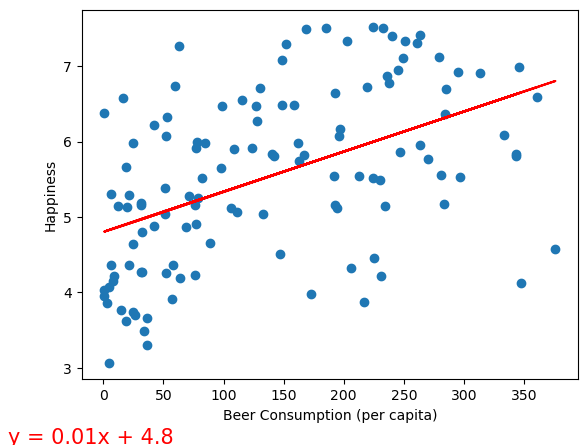

In [27]:
lin_regress(OH_happiness["Beer_PerCapita"], OH_happiness["HappinessScore"], "Beer Consumption (per capita)")

The r-value is: 0.4472116760736491


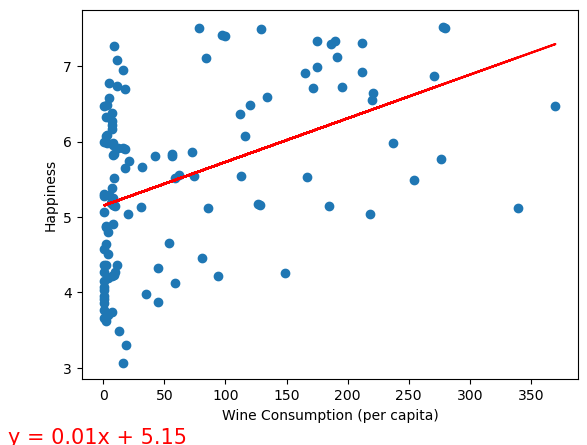

In [28]:
lin_regress(OH_happiness["Wine_PerCapita"], OH_happiness["HappinessScore"], "Wine Consumption (per capita)")

The r-value is: 0.24612431002564708


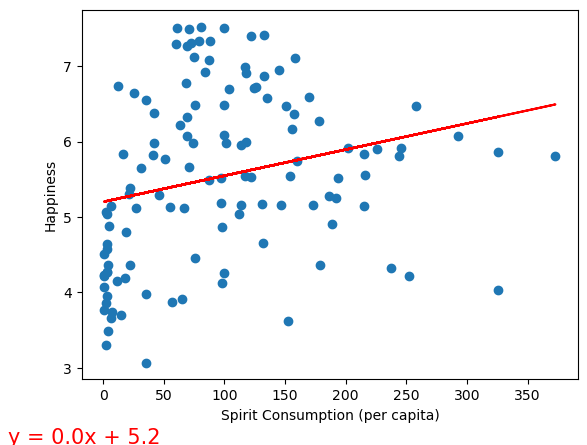

In [29]:
lin_regress(OH_happiness["Spirit_PerCapita"], OH_happiness["HappinessScore"], "Spirit Consumption (per capita)")